# Lesson 14 Regression: Understand the Models

**Regularization** was useful to improve ML models, or at least that's the goal.  

We noticed, regularization did not dramatically increase the $R2$ score of the fit all that much. In this section, we will cover the inner workings of exactly that.  

Once we fit the models, we can also look at the weights generated by the various model types. 

\begin{align}
    \text{Linear: } min_w ||y - Xw||_2^2 \\[0.25cm]
    \text{Ridge: } min_w ||y - Xw||_2^2 + \lambda ||w||_2^2 \\[0.25cm]
    \text{Lasso: } min_w ||y - Xw||_2^2 + \lambda ||w||_1^1 
\end{align}

We can visualize through a heat map to compare them easily.

# Imports

In [1]:
%cd ..

/Users/jaimemerizalde/Desktop/Library/Machine Learning Udemy Course


In [75]:
from Library import data
import pandas as pd

import csv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Get Data

In [78]:
df = data.get_data("Datasets/LifeExpectancy.csv", index_col=[0])
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [79]:
# Get X_data.
categorical_columns = list(df.dtypes[df.dtypes=="O"].index.values)
categorical_columns

for col in categorical_columns:
    df[col] = df[col].astype("category")
df.drop(columns=categorical_columns, inplace=True)

X = df.loc[:, df.columns != "life_expectancy"]
y = df["life_expectancy"]

# Train test split
X_train, X_test, y_train, y_test, = train_test_split(X, y)

X_train, y_train = data.remove_missing_and_nonNumerical_values(X_train, y_train)


Original Size X: (2203, 19) y: (2203,)
Removed []
New Size X: (1223, 19) y: (1223,)


# Get Weights

We can rerun the analysis here or better yet, we can capture / save the analysis from its origins, then pull it in here.  

In [82]:
filepath = "Lesson 13 - Lasso Regression/lasso_cv_weights.csv"
lasso_cv_weights = data.load_weights(filepath)

filepath = "Lesson 12 - Ridge Regression/ridge_cv_weights.csv"
ridge_cv_weights = data.load_weights(filepath)

filepath = "Lesson 11 - Linear Regression/linear_regression_weights.csv"
linear_cv_weights = data.load_weights(filepath)

# Place in a dataframe.
weights = pd.DataFrame(
    {
        "linear": linear_cv_weights, 
        "ridge": ridge_cv_weights, 
        "lasso": lasso_cv_weights
    }, 
    index=X_train.columns # We have this here so we can call the data by the same name of how it appears in the original df.
)
weights.T

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
linear,-0.129179,-0.015504,0.109459,-0.099266,0.000470,-0.003087,-0.000021,0.023068,-0.079611,-0.001957,0.027271,0.015834,-0.448470,0.000003,-1.081427e-09,0.001099,-0.092011,10.140044,1.023914
ridge,-0.138838,-0.016472,0.098495,-0.115513,0.000311,-0.003963,-0.000020,0.026406,-0.071689,0.001376,0.059479,0.014371,-0.445590,0.000027,-3.213065e-09,-0.012716,-0.083056,10.672488,0.951866
lasso,-0.138934,-0.016475,0.098054,-0.115730,0.000311,-0.003958,-0.000020,0.026415,-0.071377,0.001380,0.059448,0.014384,-0.445613,0.000027,-3.189428e-09,-0.012691,-0.082986,10.675074,0.951954


# Visualizing Weights for Comparison

We will visualize using a heatmap here.

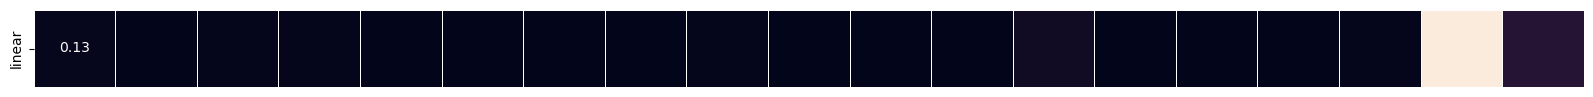

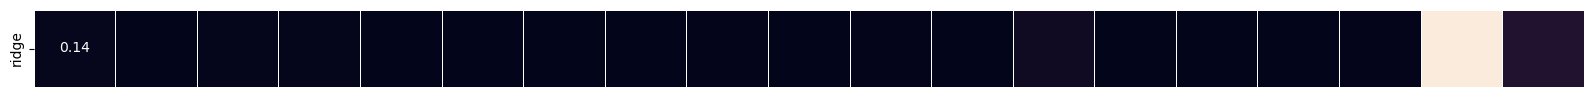

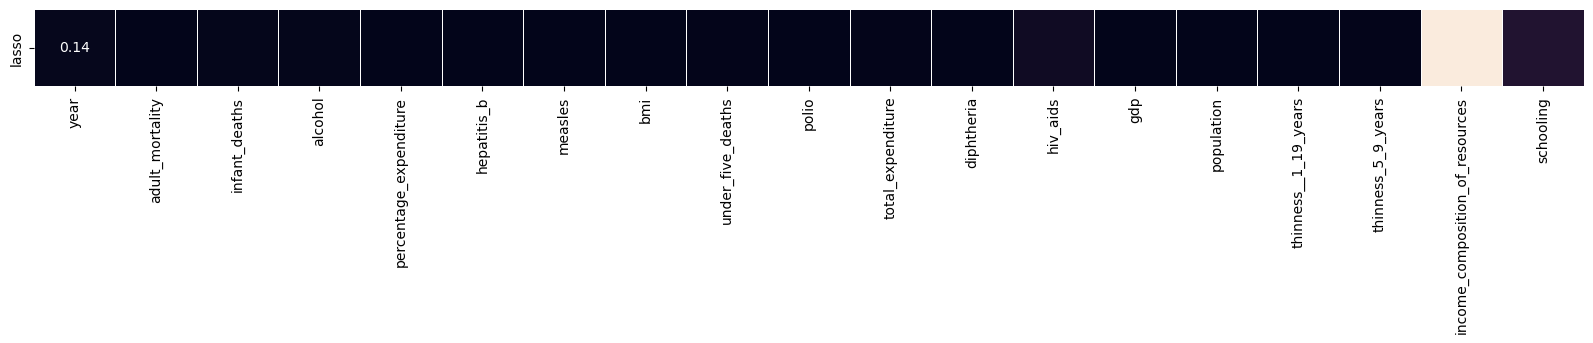

In [83]:
fig, ax = plt.subplots(figsize=(20, 1));

sns.heatmap(
    weights.T.loc[["linear"],:].abs(), 
    annot=True, linewidth=0.5, ax=ax, cbar=False,
    xticklabels=False
)
plt.figure(figsize=(20, 1))
sns.heatmap(
    weights.T.loc[["ridge"],:].abs(), 
    annot=True, linewidth=0.5, cbar=False,
    xticklabels=False
)
plt.figure(figsize=(20, 1))
sns.heatmap(
    weights.T.loc[["lasso"],:].abs(), 
    annot=True, linewidth=0.5, cbar=False,
    xticklabels=True
)

plt.show()

We can also visualize the 'X_train mean' as well. 

It may not be obvious since this backend is not doing so well, but there are a range of values here in the heatmap. There is a white-hot variable, and by comparison, everything else is a lot colder. 

The main idea here is then to SCALE the models so each feature / columns is not being weighted to heavily simply because of the size of the elements.

<Axes: >

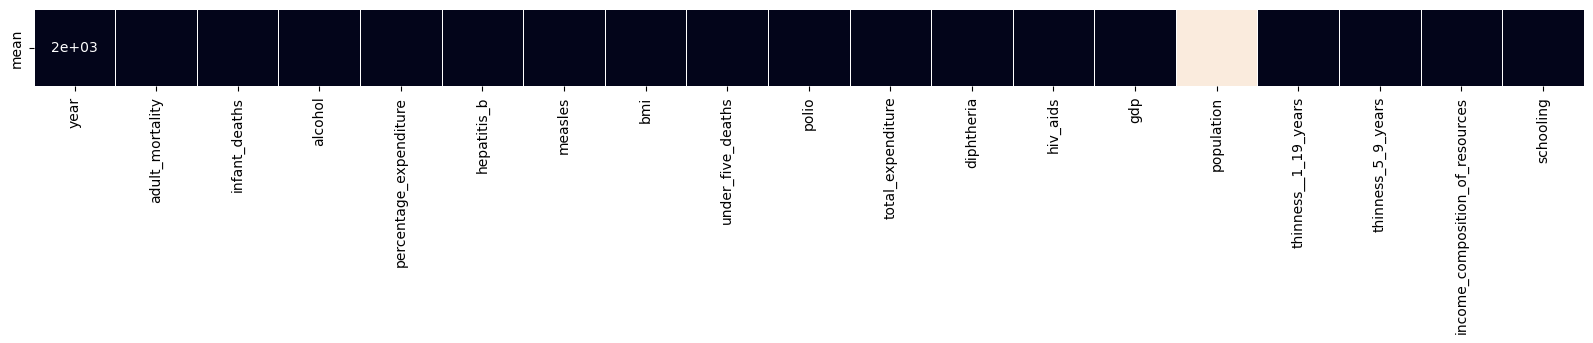

In [88]:
plt.figure(figsize=(20, 1))
sns.heatmap(
    X_train.mean().to_frame().T.rename(index={0: "mean"}), 
    annot=True, linewidth=0.5, cbar=False, xticklabels=True
)

# Scaling Data